<a href="https://colab.research.google.com/github/Panaxnotoginseng/Exercise-1-Xinyue/blob/main/extra%20data%20for%20essay.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

First I check whether Zipf’s Law of Abbreviation holds for English text.

In [34]:
##prepare the English text.

en_text = open("en_text.txt", 'r', encoding = 'utf-8').read()  #open English text file as "en_text", decoded as UTF-8.

import spacy
nlp = spacy.load("en_core_web_sm")  #load English pipeline
doc = nlp(en_text)  #tokenization
clean_en = [token for token in doc if not token.is_punct and not token.like_num] #rule out all punctuation and numbers


In [35]:
##get the frecuency of each word length.

from nltk import *
import operator
from operator import itemgetter

fdist_en = FreqDist([len(w) for w in clean_en]) #add the length of every word to a list, and get the frecuency of each length.
sort_list_en= dict(sorted(fdist_en.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.

for key, value in sort_list_en.items():
    print(key, value) #print the word length and its frequency in order.

print('There are',len(clean_en),'words in total') #print the total number of words

3 20338
2 17842
7 10120
4 9231
6 8547
5 8332
8 7974
9 6896
10 5336
11 3595
12 1717
13 1514
1 1469
14 695
15 173
16 48
17 35
18 9
19 3
20 1
There are 103875 words in total


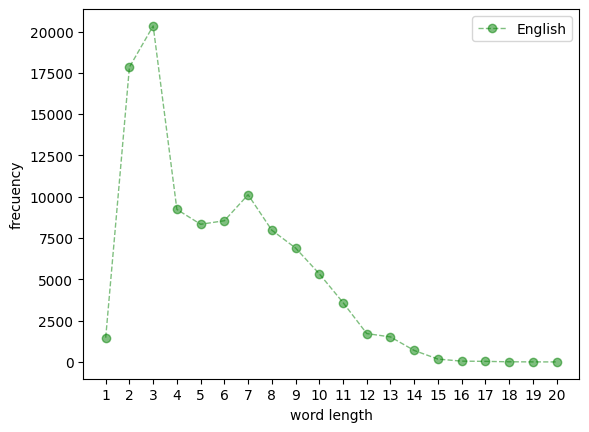

In [45]:
##draw a diagram of word length and corresponding frequency

import matplotlib.pyplot as plt
import numpy as np
A_en = sorted(fdist_en.items(), key=operator.itemgetter(0), reverse = False)  #sort the list of word length:frecuency according to word length
B_en = []
C_en = []
for key, value in A_en:
    B_en.append(key) #add word length to list B
    C_en.append(value) #add frequency to list C

x_axis_data_en = B_en #word length will be reflected on x axis
y_axis_data_en = C_en #frequency will be reflected on y axis

my_x_ticks = np.arange(0, 21, 1)
plt.xticks(my_x_ticks)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_en, y_axis_data_en, 'go--', alpha=0.5, linewidth=1, label='English') #set the color, legend, transparency, linewidth and label

plt.legend()  #show legend
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

plt.show()

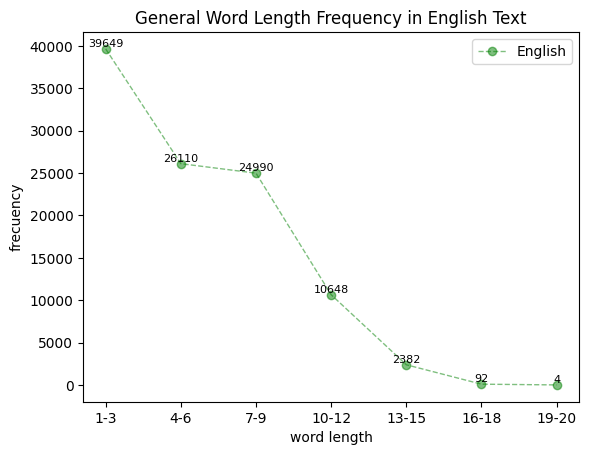

In [51]:
##draw a more general diagram of word length and corresponding frequency

B_ge_en = ['1-3', '4-6', '7-9', '10-12', '13-15', '16-18', '19-20'] #split all words into groups according to the length
C_ge_en = [(fdist_en[1]+fdist_en[2]+fdist_en[3]),(fdist_en[4]+fdist_en[5]+fdist_en[6]),(fdist_en[7]+fdist_en[8]+fdist_en[9]),(fdist_en[10]+fdist_en[11]+fdist_en[12]),(fdist_en[13]+fdist_en[14]+fdist_en[15]),(fdist_en[16]+fdist_en[17]+fdist_en[18]),(fdist_en[19]+fdist_en[20])]  #get the total frequency of each group

x_axis_data_ge = B_ge_en #word length group will be reflected on x axis
y_axis_data_ge = C_ge_en #frequency will be reflected on y axis

my_x_ticks = np.arange(0, 8, 1)
plt.xticks(my_x_ticks)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_ge, y_axis_data_ge, 'go--', alpha=0.5, linewidth=1, label='English') #set the color, legend, transparency, linewidth and label


plt.legend()  #show legend
plt.title('General Word Length Frequency in English Text')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

for a, b in zip(B_ge_en, C_ge_en):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8) #show frequency number

plt.show()
print('\n')

In [38]:
##100 most frequent words

fdistwords_en = FreqDist([w for w in lemmas]) #add the length of every word to a list, and get the frecuency of each length.
en_words= dict(sorted(fdistwords_en.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.

from collections import Counter

counts_en = Counter(en_words) #count the frequency of words
for word,count in counts_en.most_common(100): #print the 100 most frequent words
    print(word,count)

the 10073
of 5710
and 4484
to 3468
in 2630
be 1989
on 1271
for 1252
a 1157
that 962
by 766
with 752
as 695
have 675
United 524
its 523
Nations 439
at 437
from 363
nuclear 357
States 355
Council 346
all 333
include 321
or 300
international 285
it 278
country 276
an 272
General 269
which 267
other 266
this 265
their 264
support 263
Committee 260
report 251
also 248
weapon 240
development 239
Security 237
will 236
provide 228
use 213
's 210
take 202
resolution 200
implementation 198
continue 192
Secretary 181
not 175
Republic 175
under 174
work 173
hold 172
security 170
Conference 166
meeting 163
make 161
party 161
I 160
effort 160
such 158
information 156
regard 149
national 148
note 147
need 142
International 141
people 140
those 140
programme 140
issue 138
they 135
through 134
level 132
right 132
into 131
should 131
organization 130
resource 129
request 129
system 129
would 127
against 127
Government 126
between 124
ensure 123
develop 123
measure 122
member 122
well 121
March 121
durin

Now I check whether Zipf’s Law of Abbreviation holds for Chinese text.

In [ ]:
##prepare the Chinese text.

#!python -m spacy download zh_core_web_sm #download chinese pipeline if need to.
import re

zh_text = open("zh_text.txt", 'r', encoding = 'utf-8').read()  #open Chinese text file as "zh_text", decoded as UTF-8.
zh_text = re.sub(r'[^\u4e00-\u9fa5]','', zh_text)
nlp2 = spacy.load("zh_core_web_sm")  #load Chinese pipeline
doc2 = nlp2(zh_text)  #tokenization

In [ ]:
##get the frecuency of each word length.

fdist_zh = FreqDist([len(w) for w in doc2]) #add the length of every word to a list, and get the frecuency of each length.
sort_list_zh= dict(sorted(fdist_zh.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.
for key, value in sort_list_zh.items():
    print(key, value) #print the word length and its frequency in order.

print('There are',len(doc2),'words in total')  #print the total number of words

for i in doc2: #to see what are the long words
  if len(i)>6:
    print(i)

2 53913
1 24164
3 7004
4 1048
5 275
6 72
8 24
7 24
13 7
9 5
10 4
12 1
11 1
There are 86542 words in total
埃斯卡兰特阿斯本
杰拉德斯雅各布斯范
巴哈尔伊德里斯阿布加尔达
佩特科德拉甘诺夫
大不列颠及北爱尔兰联合王国
塞阿图尔德诺特梅
萨摩亚安圭拉百
英属维尔京群岛
福克兰群岛马尔维纳斯
法属波利尼西亚
艾哈迈德扎希德
阿布巴卡尔马加吉
恩科萨扎娜德拉米尼
大不列颠及北爱尔兰联合王国
伊斯梅尔乌尔德
马斯鲁尔艾哈迈德少
大不列颠及北爱尔兰联合王国
马修里克罗夫特
克里斯托弗罗斯
纳戈尔诺卡拉巴赫
纳戈尔诺卡拉巴赫
乔治巴尔蒂斯奥塔斯
埃利普罗杰克逊
巴布亚新几内亚
巴布亚新几内亚
纳戈尔诺卡拉巴赫
奥斯陆纳亚里特
麦克莱新西兰人
大不列颠及北爱尔兰联合王国
莫桑比克坦桑尼亚
第十五十六十八
克里米亚鞑靼人
纳戈尔诺卡拉巴赫
阿莫霍斯托斯港
热尔沃尔夫鲁姆恩迪亚耶
米歇尔约瑟夫马尔泰利
大不列颠及北爱尔兰联合王国
基里尔格沃尔吉安
阿莫霍斯托斯港
布里吉拉菲尼月
萨赫恩杰德拉亚萨
巴萨米斯阿布丁纳
阿尤布卡法尔纳吉德塔
德里克普拉姆布利
纳戈尔诺卡拉巴赫
纳戈尔诺卡拉巴赫
纳戈尔诺卡拉巴赫
大不列颠及北爱尔兰联合王国
皮埃尔克朗恩布尔
第三十六三十八
纳戈尔诺卡拉巴赫
马蒂亚斯德特兰
福克兰群岛马尔维纳斯
马尔维纳斯群岛
叙利亚伊德利布省
纳戈尔诺卡拉巴赫
纳戈尔诺卡拉巴赫
法属波利尼西亚
卡拉拉奥沃尔夫鲁姆
大不列颠及北爱尔兰联合王国
以特拉特洛尔科
杜夫阿尔及利亚
叙利亚伊德利布市
纳戈尔诺卡拉巴赫
阿莫霍斯托斯港
纳戈尔诺卡拉巴赫


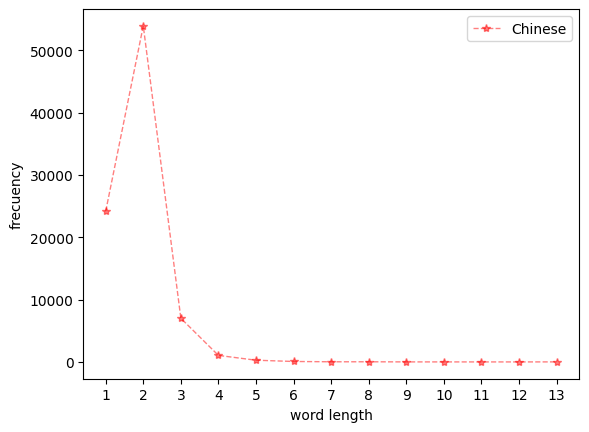

In [46]:
##draw a diagram of word length and corresponding frequency

A_zh = sorted(fdist_zh.items(), key=operator.itemgetter(0), reverse = False)  #sort the list of word length:frecuency according to word length
B_zh = []
C_zh = []
i = 0
for key, value in A_zh:
    B_zh.append(key) #add word length to list B
    C_zh.append(value) #add frequency to list C
#    i += 1 #apply to see the diagram for word length from 1 to 7
#    if i > 6:
#      break

x_axis_data_zh = B_zh #word length will be reflected on x axis
y_axis_data_zh = C_zh #frequency will be reflected on y axis

my_x_ticks_zh = np.arange(0, 17, 1)
plt.xticks(my_x_ticks_zh)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_zh, y_axis_data_zh, 'r*--', alpha=0.5, linewidth=1, label='Chinese') #set the color, legend, transparency, linewidth and label


plt.legend()  #show legend
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

plt.show()

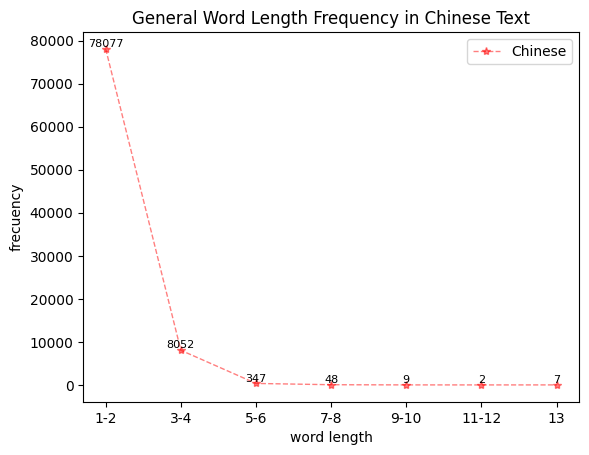

In [49]:
##draw a more general diagram of word length and corresponding frequency

B_ge_zh = ['1-2', '3-4', '5-6', '7-8', '9-10', '11-12', '13'] #split all words into groups according to the length
C_ge_zh = [(fdist_zh[1]+fdist_zh[2]),(fdist_zh[3]+fdist_zh[4]),(fdist_zh[5]+fdist_zh[6]),(fdist_zh[7]+fdist_zh[8]),(fdist_zh[9]+fdist_zh[10]),(fdist_zh[11]+fdist_zh[12]),(fdist_zh[13])]  #get the total frequency of each group

x_axis_data_ge = B_ge_zh #word length group will be reflected on x axis
y_axis_data_ge = C_ge_zh #frequency will be reflected on y axis

my_x_ticks = np.arange(0, 8, 1)
plt.xticks(my_x_ticks)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_ge, y_axis_data_ge, 'r*--', alpha=0.5, linewidth=1, label='Chinese') #set the color, legend, transparency, linewidth and label


plt.legend()  #show legend
plt.title('General Word Length Frequency in Chinese Text')  #set title
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

for a, b in zip(B_ge_zh, C_ge_zh):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8) #show frequency number

plt.show()
print('\n')

Jieba is a reliable package for tokenizing Chinese text. Now I use it to make a comparison and see if spacy is doing well enough.

In [ ]:
##Using jieba to segment the Chinese text.
import jieba
from collections import Counter

zh_words2 = jieba.lcut(zh_text)
fdist_zh2 = FreqDist([len(w) for w in zh_words2]) #add the length of every word to a list, and get the frecuency of each length.
sort_list_zh2= dict(sorted(fdist_zh2.items(), key=operator.itemgetter(1), reverse = True)) #list the word length according to its frecuency, from the highest to the lowest.


for key, value in sort_list_zh2.items():
    print(key, value) #print the word length and its frequency in order.

print('There are',len(zh_words2),'words in total')  #print the total number of words

for i in zh_words2: #to see what are the long words
  if len(i)>6:
    print(i)

2 49643
1 23326
3 6549
4 3388
5 341
7 94
6 91
8 50
9 32
11 9
10 4
13 1
There are 83528 words in total
刚果民主共和国
刚果民主共和国
刚果民主共和国
经济合作与发展组织
海湾合作委员会
海湾合作委员会
伊朗伊斯兰共和国
伊朗伊斯兰共和国
沙特阿拉伯王国
伊朗伊斯兰共和国
巴勒斯坦解放组织
伊朗伊斯兰共和国
阿拉伯联合酋长国
刚果民主共和国
塞浦路斯共和国
刚果民主共和国
英属维尔京群岛
马尔维纳斯群岛
法属波利尼西亚
伊朗伊斯兰共和国
伊朗伊斯兰共和国
塞浦路斯共和国
塞浦路斯共和国
阿拉伯叙利亚共和国
阿拉伯叙利亚共和国
塞尔维亚共和国
刚果民主共和国
刚果民主共和国
海湾合作委员会
海湾合作委员会
阿拉伯叙利亚共和国
阿拉伯叙利亚共和国
第二次世界大战
第二次世界大战
朝鲜民主主义人民共和国
阿塞拜疆共和国
第一次世界大战
联合国开发计划署
国际原子能机构
伊朗伊斯兰共和国
亚美尼亚共和国
阿拉伯叙利亚共和国
伊朗伊斯兰共和国
巴布亚新几内亚
巴布亚新几内亚
国际原子能机构
伊朗伊斯兰共和国
阿拉伯叙利亚共和国
联合国贸易和发展会议
阿拉伯叙利亚共和国
联合国粮食及农业组织
沙特阿拉伯王国
伊朗伊斯兰共和国
联合国开发计划署
第二次世界大战
刚果民主共和国
伊朗伊斯兰共和国
沙特阿拉伯王国
塞浦路斯共和国
印度尼西亚共和国
德意志联邦共和国
纽约联合国总部
阿拉伯叙利亚共和国
世界粮食计划署
坦桑尼亚联合共和国
联合国难民事务高级专员公署
阿拉伯叙利亚共和国
朝鲜民主主义人民共和国
刚果民主共和国
朝鲜民主主义人民共和国
坦桑尼亚联合共和国
联合国国际贸易法委员会
伊朗伊斯兰共和国
刚果民主共和国
联合国日内瓦办事处
塞浦路斯共和国
国际原子能机构
伊朗伊斯兰共和国
伊朗伊斯兰共和国
联合国人口基金
阿拉伯叙利亚共和国
刚果民主共和国
联合国开发计划署
联合国人口基金
刚果民主共和国
伊朗伊斯兰共和国
塞浦路斯共和国
伊朗伊斯兰共和国
塞浦路斯共和国
塞浦路斯共和国
阿拉伯国家联盟
联合国环境规划署
朝鲜民主主义人民共和国
阿塞拜疆共和国
阿拉伯叙利亚共和国
联合国国际贸易法委员会
阿拉伯叙利亚共和国
阿塞拜疆共和国
联合国安全理事会
联合国日内瓦办事处
阿塞拜

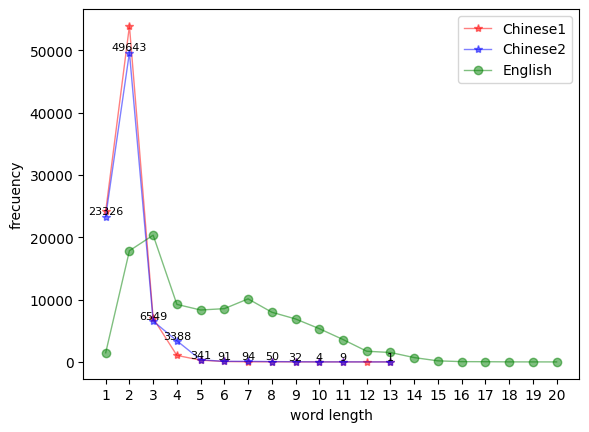

In [48]:
##draw a diagram of word length and corresponding frequency

D = sorted(fdist_zh2.items(), key=operator.itemgetter(0), reverse = False)  #sort the list of word length:frecuency according to word length
E = []
F = []
i = 0
for key, value in D:
    E.append(key) #add word length to list E
    F.append(value) #add frequency to list F
#    i += 1 #apply to see the diagram for word length from 1 to 7
#    if i > 6:
#      break

x_axis_data_zh2 = E #word length will be reflected on x axis
y_axis_data_zh2 = F #frequency will be reflected on y axis

my_x_ticks = np.arange(0, 21, 1)
plt.xticks(my_x_ticks)  #set the range and interval of ticks on x axis

plt.plot(x_axis_data_zh, y_axis_data_zh, 'r*-', alpha=0.5, linewidth=1, label='Chinese1')  #Chinese word length distribution, segmented by spacy
plt.plot(x_axis_data_zh2, y_axis_data_zh2, 'b*-', alpha=0.5, linewidth=1, label='Chinese2')  #Chinese word length distribution, segmented by jieba
plt.plot(x_axis_data_en, y_axis_data_en, 'go-', alpha=0.5, linewidth=1, label='English') #English word length distribution, segmented by spacy

plt.legend()  #show legend
plt.xlabel('word length') #x axis label
plt.ylabel('frecuency')#y axis label

for a, b in zip(E, F):
    plt.text(a, b, b, ha='center', va='bottom', fontsize=8)

plt.show()
